# Project_Business_Intelligence-International_Retailer

As part of my Microsoft Power BI Data Analyst Associate (PL-300) certification with AiCore, I have been tasked with the following Data Analytics Power BI Report project:

> A medium-sized international retailer aims to elevate their business intelligence practices to drive better decision-making. With operations spanning multiple regions, they have accumulated a significant volume of sales data from various sources over the years. The C-suite executives have requested a comprehensive quarterly report to provide actionable insights. This report will demonstrate my expertise in extracting and transforming data from disparate sources, designing a robust data model based on a star schema, and constructing an insightful, multi-page report tailored to their needs.

Throughout this report, colours have been used to differentiate data types:
   - <span style='color:teal'>Teal</span> = Table Names
   - <span style='color:dodgerblue'>Dodger Blue</span> = Column Names
   - <span style='color:mediumseagreen'>Medium Sea Green</span> = Measures



## 1. Data Loading and Preparation
The initial phase of the project involved loading and preparing data in Power BI, leveraging multiple data sources and applying necessary transformations to ensure consistency and usability.




### Data Sources
- Azure SQL Database
- Azure Blob Storage
- Web-hosted CSV Files
- Local Folders

### Methods and Transformations:
1. **Azure SQL Database** – **<span style='color:dodgerblue'>Orders Table</span>**
   - Connected to the Azure SQL Database using credentials provided by AiCore.
   - Transformations in Power BI Query Editor:
      - Removed the <span style='color:teal'>Card Number</span> column to ensure data privacy.
      - Split <span style='color:teal'>Order Date</span> and <span style='color:teal'>Shipping Date</span> into separate date and time columns.
      - Changed the data type of the new columns to *date* and *time* respectively.
      - Filtered and removed rows with missing values in the <span style='color:teal'>Order Date</span> column.
      - Renamed columns to adhere to Power BI naming conventions to use upper case and spacing instead of _ for example::
         - renamed product_code → <span style='color:teal'>Product Code</span>.

2. **Web-hosted CSV File** – **<span style='color:dodgerblue'>Products Table</span>**
   - Downloaded the CSV file from the web and imported it into Power BI.
   - Transformations in Power BI Query Editor:
      - Split date_added column into seperate <span style='color:teal'>Date Added</span> and <span style='color:teal'>Time Added</span> columns. As <span style='color:teal'>Time Added</span> was empty, the column was removed. 
      - Changed the data type for <span style='color:teal'>Cost Price</span> and <span style='color:teal'>Sales Price</span> to *Decimal Number* and for <span style='color:teal'>Date Added</span> to *Date*.
      - Filtered and removed rows with missing values in <span style='color:teal'>Date Added</span>
      - Removed duplicates from the <span style='color:teal'>Product Code</span> column to ensure that each product code is unique.
      - Renamed columns to align with Power BI naming conventions to use upper case and spacing instead of _ for example:
         - product_uuid → <span style='color:teal'>Product UUID</span>
         - availability → <span style='color:teal'>Availability</span>
                   
3. **Azure Blob Storage** – **<span style='color:dodgerblue'>Stores Table</span>**
   - Connected to Azure Blob Storage using provided credentials.
   - Transformations in Power BI Query Editor:
      - Clicked on Binary to expand all data and removed unnecessary columns, including the <span style='color:teal'>Regions</span> column, which only indicated the source of the data.
      - Replaced misspelled country names in the <span style='color:teal'>Regions</span> column (e.g., replaced "EAAmerica" with "America" and "EAEurope" with "Europe").
      - Updated the data type for
         - <span style='color:teal'>Date Opened</span> : Changed to *Date*
         - <span style='color:teal'>Longitude</span> and <span style='color:teal'>Latitude</span> : Changed to *Decimal Number*
         - <span style='color:teal'>Staff Numbers</span>: Changed to *Whole Number*
         - <span style='color:teal'>Address</span> , <span style='color:teal'>Town</span>, <span style='color:teal'>Store Type</span> , <span style='color:teal'>Country</span> , <span style='color:teal'>Country Region</span> and <span style='color:teal'>Country Codes</span> : Changed to *Text*
      - Filtered and removed rows missing from values in <span style='color:teal'>Address</span>
      - Renamed columns to follow Power BI naming conventions to use upper case and spacing instead of _ for example:
         - address → <span style='color:teal'>Address</span>
         - country_region → <span style='color:teal'>Country Region</span>
         - renamed Region → <span style='color:teal'>World Region</span> to make it more intuitive.
    
4. **Local Folder** - **<span style='color:dodgerblue'>Customers Table</span>**
   - Downloaded and unzipped a file, then used Power BI’s Folder *connector* to combine and transform the files into a single query.
   - Transformations within Query Editor:
    - Removed <span style='color:teal'>Source</span> Column as unnecessary.
    - Created a <span style='color:teal'>Full Name</span> column using the *"Column from Examples"* feature by combining First Name and Last Name. Deleted the original columns afterward.
    - Updated the data type for
      - <span style='color:teal'>Date of Birth</span> and <span style='color:teal'>Join Date</span>: Changed to *Date/Time*
      - <span style='color:teal'>Company</span>, <span style='color:teal'>Email</span> , <span style='color:teal'>Address</span> , <span style='color:teal'>Country</span>, <span style='color:teal'>Country Code</span> , <span style='color:teal'>User UUID</span> : Change to *Text*
    - Renamed columns to align with PowerBI naming conventions.

## 2. Construction of Data Model
The second phase of the project onvolved constructing the data model. 



### 2a. Creation of Date Table
To enable time intelligence functionality within the data model, a <span style='color:dodgerblue'>Date Table</span> was constructed. Using the minimum <span style='color:dodgerblue'>Order Date</span> and maximum <span style='color:dodgerblue'>Shipping Date</span> from the <span style='color:dodgerblue'>Orders Table</span> , the following DAX formula was applied to generate a continuous date range covering the entire time span of the data:
 
```python
      Date Table = 
            CALENDAR(
            DATE(YEAR(MIN(Orders[Order Date])), 1, 1),
            DATE(YEAR(MAX(Orders[Shipping Date])), 12, 31)
            )
```

  - Relevant columns were then added to the <span style='color:dodgerblue'>Date Table</span> for enhanced analysis:

```python
          Day of Week = FORMAT('Date Table'[Date], "dddd")
          Month Name = FORMAT('Date Table'[Date],"MMMM")
          Month Number = MONTH('Date Table'[Date])
          Quarter = QUARTER('Date Table'[Date])
          Year = YEAR('Date Table'[Date])
          Start of Year = STARTOFYEAR('Date Table'[Date])
          Start of Quarter = STARTOFQUARTER('Date Table'[Date])
          Start of Month = STARTOFMONTH('Date Table'[Date])
          Start of Week = 'Date Table'[Date] - WEEKDAY('Date Table'[Date],2)+1
```

Once created, the <span style='color:dodgerblue'>Date Table</span> was marked as a *Date Table* in the *Model View* to ensure it integrates correctly with Power BI’s time intelligence features.

### 2b. Build Star Schema Data Model
To facilitate interaction between tables and optimize performance, a star schema was implemented. Relationships between tables were created using the *Manage Relationships* tool, leveraging automated detection and manual adjustments where necessary. All relationships listed below are one-to-many with the <span style='color:dodgerblue'>Orders Table</span> serving as the fact table. This means that each unique value in the dimension tables relates to one or more rows in the fact table:
  - <span style='color:dodgerblue'>Products</span> <span style='color:teal'>Product Code</span> → <span style='color:dodgerblue'>Orders</span> <span style='color:teal'>Product Code</span>
  - <span style='color:dodgerblue'>Store</span> <span style='color:teal'>Store Code</span> → <span style='color:dodgerblue'>Orders</span> <span style='color:teal'>Store Code</span>
  - <span style='color:dodgerblue'>Customers</span> <span style='color:teal'>User UUID</span> → <span style='color:dodgerblue'>Orders</span> <span style='color:teal'>User UUID</span>
  - <span style='color:dodgerblue'>Date</span> <span style='color:teal'>Date</span> → <span style='color:dodgerblue'>Orders</span> <span style='color:teal'>Order Date</span> - This is the active relationship.
  - <span style='color:dodgerblue'>Date</span> <span style='color:teal'>Date</span> → <span style='color:dodgerblue'>Orders</span> <span style='color:teal'>Shipping Date</span> - This is the inactive relationship.

#### Active vs Inactive Relationship
- The active relationship between <span style='color:dodgerblue'>Date</span> <span style='color:teal'>Date</span> to <span style='color:dodgerblue'>Orders</span> <span style='color:teal'>Order Date</span> because order date is typically the primary date of interest for most analyses (e.g., sales trends, order volumes, revenue). It reflects when the transaction occurred, making it the logical default for time-based reporting.
- The inactive relationship between <span style='color:dodgerblue'>Date</span> <span style='color:teal'>Date</span> to <span style='color:dodgerblue'>Orders</span> <span style='color:teal'>Shipping Date</span> is created to support alternative analyses involving shipping dates, without interfering with the default behavior of using the order date.

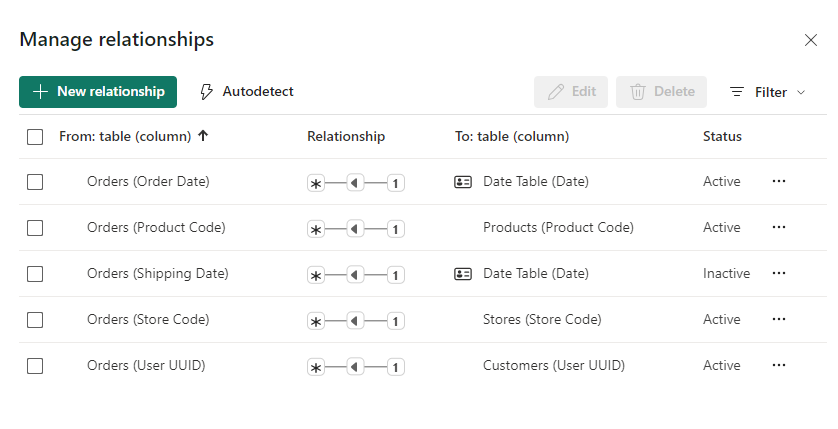

### 2c. Creation of Measures Table
Adhering to best practices, I created a separate table to house all measures. This was achieved through *Model View* > *Enter Data* > *Load*.

#### Key measures created to initiate analysis:

   - ${\textsf{\color{mediumseagreen}Total Orders}}$: 

```python
         Total Orders - COUNT('Orders'[Order Date])
```

   - ${\textsf{\color{mediumseagreen}Total Revenue}}$:

```python
         SUMX(
           'Orders',
           'Orders'[Product Quantity] * RELATED('Products'[Sales Price])
         )
```

   - ${\textsf{\color{mediumseagreen}Total Profit}}$:

```python
         SUMX(
            'Products',
            ('Products'[Sales Price] - 'Products'[Cost Price]) * 
            SUMX(RELATEDTABLE('Orders'), 'Orders'[Product Quantity])
         )
```
   - ${\textsf{\color{mediumseagreen}Total Customers}}$:

```python
         CALCULATE(
            DISTINCTCOUNT(Orders[User UUID]), 
            FILTER( 
              ALLSELECTED('Date Table'), 
              'Date Table'[Date] <= MAX('Date Table'[Date])
            )
         )
```
   - ${\textsf{\color{mediumseagreen}Total Quantity}}$:

```python
         SUM('Orders'[Product Quantity])
```
   - ${\textsf{\color{seagreen}Profit YTD}}$:

```python
         TOTALYTD([Total Profit], 'Date Table'[Date])
```
   - ${\textsf{\color{mediumseagreen}Revenue YTD}}$:
```python
           TOTALYTD([Total Revenue],'Date Table'[Date])
```

### 2c. Creation of Measures Table
Adhering to best practices, I created a separate table to house all measures. This was achieved through *Model View* > *Enter Data* > *Load*.

#### Key measures created to initiate analysis:

   - ${\textsf{\color{mediumseagreen}Total Orders}}$: 

```python
         Total Orders - COUNT('Orders'[Order Date])
```

   - ${\textsf{\color{mediumseagreen}Total Revenue}}$:

```python
         SUMX(
           'Orders',
           'Orders'[Product Quantity] * RELATED('Products'[Sales Price])
         )
```

   - ${\textsf{\color{mediumseagreen}Total Profit}}$:

```python
         SUMX(
            'Products',
            ('Products'[Sales Price] - 'Products'[Cost Price]) * 
            SUMX(RELATEDTABLE('Orders'), 'Orders'[Product Quantity])
         )
```
   - ${\textsf{\color{mediumseagreen}Total Customers}}$:

```python
         CALCULATE(
            DISTINCTCOUNT(Orders[User UUID]), 
            FILTER( 
              ALLSELECTED('Date Table'), 
              'Date Table'[Date] <= MAX('Date Table'[Date])
            )
         )
```
   - ${\textsf{\color{mediumseagreen}Total Quantity}}$:

```python
         SUM('Orders'[Product Quantity])
```
   - ${\textsf{\color{seagreen}Profit YTD}}$:

```python
         TOTALYTD([Total Profit], 'Date Table'[Date])
```
   - ${\textsf{\color{mediumseagreen}Revenue YTD}}$:
```python
           TOTALYTD([Total Revenue],'Date Table'[Date])
```

**Model View with Relationships** 

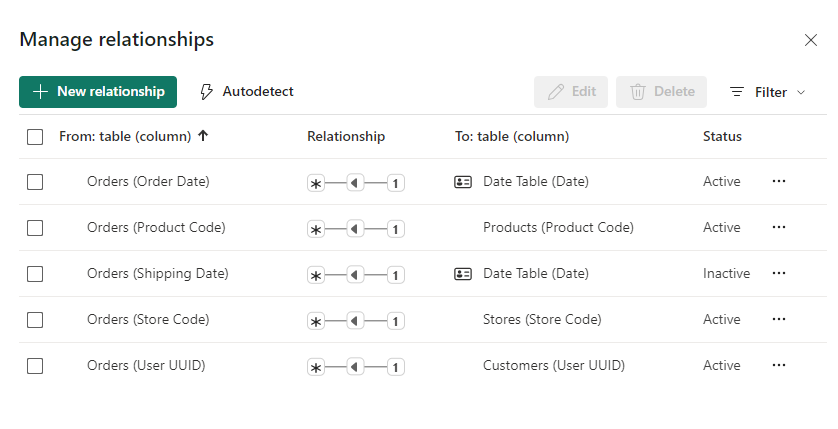

#### **Heirachies - Date and Geographical**

To enable granular analysis and drill-down functionality for both time and geographical data, hierarchies were created.

Steps for Hierarchy Creation:
   
   1. Navigate to *Model view*.
   2. Right-click desired column and select *Create Hierachy*
   3. Rename the heirarchy and organise its levels as required. 

**Geography Hierarchy Correction:**
The geography hierarchy required a correction due to missing Full Country Name. A new <span style='color:teal'>Country</span> column was created in the <span style='color:dodgerblue'>Stores</span> Table using the following DAX formula:

```python
           Country = 
              SWITCH(
              Stores[Country Code],
              "GB", "United Kingdom",
              "US", "United States",
              "DE", "Germany",
              "Unknown"
              )
```

## 3. Set up the Report


With the data in a clean and usable state, I proceeded to create the report pages designed to provide meaningful insights for the intended audience. The report consists of four pages: **Executive Summary**, **Customer Detail**, **Product Detail**, and **Stores Map**.

To enhance navigation, a sidebar was created by inserting a narrow, coloured rectangle on the left side of the **Executive Summary** page via the *Insert* > *Shapes* > *Rectangle* option. The shape was formatted with a contrasting colour and duplicated across all other pages for consistency. Further editing can be done to the shape by double clicking until the *Format Shape* pane pops up.

> If the *Format Shape* pane does not pop up you may need to enable On-object interaction which can be altered via *File* > *Options & Settings* > Preview Features* > *On-object interation*

   ![image](https://github.com/user-attachments/assets/97480e73-0460-4754-8ee1-bedb76c27dda)

A visually appealing theme was chosen to ensure consistency throughout the report. While the theme is currently generic, it can be customised to match the brand colours of the company receiving the report. Themes can be adjusted via the *View* tab under *Themes*.

### 3a. Customer Detail Page
The **Customer Detail** Page was designed to provide comprehensive insights into customer metrics. 

#### 1. Key Metrics (Card Visuals):
   - ${\textsf{\color{mediumseagreen}Total Customers}}$
   - ${\textsf{\color{mediumseagreen}Total Revenue per Customer}}$

           Revenue per Customer = [Total Revenue] / [Total Customers]
     
These card visuals were placed on top of coloured background boxes to enhance visibility and contrast.

![image](https://github.com/user-attachments/assets/305687a3-9c11-4b79-bb46-0aeca97cb029)


#### 2. Donut Charts 
Two donut charts were created to display:
   - ${\textsf{\color{mediumseagreen}Total Customers}}$ by Country
   - ${\textsf{\color{mediumseagreen}Total Customers}}$ by Category

The *Format pane* was used to customize the visuals, including:
   - Rotating the charts to make all labels easily readable.
   - Adjusting font size and color for better readability

![Untitled design](https://github.com/user-attachments/assets/85df259c-f829-4f82-a0bc-28cde059e2f6)


#### 3. Line chart: Cumulative Customer Count
   - X-axis: Date hierarchy (from Part 2), restricted to monthly intervals.
   - Y-axis: ${\textsf{\color{mediumseagreen}Total Customers}}$

Customizations included:
   - Removing axis headers while retaining a graph title.
   - Adding a trend line (coloured orange for contrast).
   - Adding a forecast to predict the next 10 years of customer growth at 95% confidence.

The shaded area in the forecast represents the upper and lower bounds of the prediction. For example, the forecast for 2035 shows an upper limit of over 20,000 customers and a lower limit of approximately 12,500 customers.
![image](https://github.com/user-attachments/assets/fc360370-5a1e-4c0a-91a1-8b5956b6aaf6)


#### 4. Top 20 Customers Table
A table was created to display the top 20 customers by total revenue, with the following columns:
   - ${\textsf{\color{aqua}Customers}}$ ${\textsf{\color{teal}Full Name}}$
   - ${\textsf{\color{mediumseagreen}Total Revenue}}$
   - ${\textsf{\color{mediumseagreen}Total Orders}}$
     
To avoid duplicate names, the table was filtered by ${\textsf{\color{aqua}Customers}}$ ${\textsf{\color{teal}Customer UUID}}$ and ranked by ${\textsf{\color{mediumseagreen}Total Revenue}}$. Additional enhancements included:

   - Adding data bars for revenue to visually represent performance.

![Untitled design (2)](https://github.com/user-attachments/assets/305ae648-d63f-40ef-9006-189c56bdc36a)

#### 5. Top Customer Highlights (Cards)
Three cards were created to display key details about the top customer:
   - Top Customer Name (filtered by ${\textsf{\color{teal}User UUID}}$, top 1 by ${\textsf{\color{mediumseagreen}Total Revenue}}$).
   - ${\textsf{\color{mediumseagreen}Total Orders}}$ by Top Customer.
   - ${\textsf{\color{mediumseagreen}Total Revenue}}$  by Top Customer.
  
#### 6. Date Slicer
A date slicer was added to enable dynamic filtering of all visuals on the page by the selected time period.
  
**The finished layout is below:**

![image](https://github.com/user-attachments/assets/c6cf9887-8e3c-42a5-a965-98bc9c163cb7)

### 3b. Executve Summary Page
The Executive Summary page was designed to provide an overview of the company’s performance, with the following visuals:

#### 1. Total Revenue, Profit & Orders
   - Card visuals were adapted from the Customer page, showing key metrics of ${\textsf{\color{mediumseagreen}Total Revenue}}$, ${\textsf{\color{mediumseagreen}Total Profit}}$, and ${\textsf{\color{mediumseagreen}Total Orders}}$.
   - Consistent formatting was applied for clarity and alignment with the **Customer page** layout.

  ![image](https://github.com/user-attachments/assets/6bb55583-00bd-4259-852e-37a94e9bb873)

#### 2. Revenue Against Time
  - A line chart was used, similar to the **Customer page’s** format, showing revenue over time.
   - The x-axis was set to the **Date Hierarchy**, with week and day views disabled, while the y-axis reflected ${\textsf{\color{mediumseagreen}Total Revenue}}$.
 
  ![image](https://github.com/user-attachments/assets/6a431459-0b09-4e6f-afbc-0fcfd33e1031)

#### 3. Orders by Revenue & Country
   - Donut charts were used to display ${\textsf{\color{mediumseagreen}Total Revenue}}$ segmented by ${\textsf{\color{aqua}Customers}}$ ${\textsf{\color{teal}Country}}$ and ${\textsf{\color{aqua}Products}}$ ${\textsf{\color{teal}Category}}$, with consistent color styling to maintain uniformity across the report.

![image](https://github.com/user-attachments/assets/fe4c6e73-ab1c-4b64-9b74-f62331bd2c01)

#### 4. Orders by Category
   - A bar chart was used to show ${\textsf{\color{mediumseagreen}Total Orders}}$ by ${\textsf{\color{aqua}Products}}$ ${\textsf{\color{teal}Category}}$, using data similar to the Total Customers by Product Category chart from the **Customer page**, ensuring consistency in colors.

![image](https://github.com/user-attachments/assets/233b1da1-796a-4f01-b683-737ed570677a)

#### 5. KPIs for Quarterly Revenue, Orders & Profits
   - New measures were created for the previous quarter's metrics:
      - ${\textsf{\color{mediumseagreen}Previous Quarter Revenue}}$, ${\textsf{\color{mediumseagreen}Previous Quarter Orders}}$, and ${\textsf{\color{mediumseagreen}Previous Quarter Profit}}$ were calculated using DAX formulas with DATEADD:

              Previous Quarter Revenue = CALCULATE(
                [Total Revenue],
                DATEADD('Date Table'[Date], -1, QUARTER))
      
              Previous Quarter Orders = CALCULATE(
                 [Total Orders],
                 DATEADD('Date Table'[Date], -1, QUARTER))
      
              Previous Quarter Profit = CALCULATE(
                 [Total Profit],
                 DATEADD('Date Table'[Date], -1, QUARTER))

- ${\textsf{\color{mediumseagreen}Target Revenue}}$, ${\textsf{\color{mediumseagreen}Target Orders}}$ and ${\textsf{\color{mediumseagreen}Target Profit}}$ were set to 5% growth for each metric.
  
       Target Revenue = [Previous Quarter Revenue] *1.05
       Target Orders = [Previous Quarter Orders] *1.05
       Target Profit = [Previous Quarter Profit] *1.05

- KPI cards were used to display the actual values alongside the targets:

   - Value = ${\textsf{\color{mediumseagreen}Total Revenue / Orders / Profit }}$
   - Trend Axis = ${\textsf{\color{aqua}Date}}$ ${\textsf{\color{teal}Start of Quarter}}$
   - Target = ${\textsf{\color{mediumseagreen}Target Revenue / Orders / Profit }}$
- The KPI cards were formatted with color changes to highlight underperformance in red, making it stand out visually for the executives.

Using the formatting tools, editied so that the bad colour was red and so that it stood out. 

![image](https://github.com/user-attachments/assets/3ba1be30-c8e8-4b96-b620-199cea7323e2)

### 3c. Product Detail Page

The **Product Detail page** provides an in-depth look at product performance, with the ability to filter by product and region, offering insights on key metrics such as Orders, Revenue, and Profit. Here’s a breakdown of the features and visualizations added:

#### 1. KPI Target Measures for Product Performance
   - The CEO requested a 10% increase in Orders, Revenue, and Profit for the target metrics, relative to the previous quarter.
       - ${\textsf{\color{mediumseagreen}Target Revenue}}$ was calculated as:

             Target Revenue = [Previous Quarter Revenue] * 1.10

- To show the current quarter’s performance, the following measures were created:
  - ${\textsf{\color{mediumseagreen}Current Quarter Revenue}}$
   
            Current Quarter Revenue = TOTALQTD([Total Revenue], 'Date Table'[Date])
- Three separate gauge visuals were added to the page—one each for Orders, Revenue, and Profit:
   - The ${\textsf{\color{mediumseagreen}Current Quarter Revenue}}$ was set as the value for the gauge, and the ${\textsf{\color{mediumseagreen}Target Revenue}}$ (1.10) was set as the maximum.
   - Conditional formatting was applied to highlight the gauge in red if performance was below the target.

![image](https://github.com/user-attachments/assets/f1d0883e-625b-4911-904e-c10ae8843f73)

![image](https://github.com/user-attachments/assets/ab5c0825-3223-4b85-9ec6-f3a0479683c5)

#### Visual Issue: No Data for Current Quarter
   - The data finishes in June 2023, leaving the current quarter and previous quarter without any data. As a result, a blank visualisation was initially displayed.
   - To address this, the visual was filtered to the start of the quarter with known data (April 1, 2023), ensuring the gauge works as intended without affecting other visuals.

![image](https://github.com/user-attachments/assets/76ed3862-a24c-4642-98d3-e55e7483e43f)

![image](https://github.com/user-attachments/assets/0725bf1f-8142-49f4-a9fb-50fa3b5d15f8)


#### 2. Filter State Cards
   - Placeholder shapes were added for filter state cards, allowing the user to filter by Category or Country.
   - New measures were created for each filter:
     - Category Selection:

    Category Selection = 
    IF(
      ISFILTERED(Products[Category]),
      IF(
        HASONEVALUE(Products[Category]),
        SELECTEDVALUE(Products[Category], "No Selection"), 
          "Multiple Selections"),
      "No Selection"
      )

- Country selection:

      Country Selection = 
      IF(
         ISFILTERED(Stores[Country]),
            IF(
               HASONEVALUE(Stores[Country]),
               SELECTEDVALUE(Stores[Country],"No Selection"),
               "Multiple Selections"), 
            "No Selection"
       )

![image](https://github.com/user-attachments/assets/b5820e11-2f23-4ec2-8de8-1ea3a0a410f3)



#### 3.Revenue by Product Category over time
- An Area Chart visual was added to display revenue trends by Product Category:
   - ${\textsf{\color{aqua}Date}}$ ${\textsf{\color{teal}Start of Quarter}}$ was used on the x-axis.
   - ${\textsf{\color{mediumseagreen}Total Revenue}}$ was used on the y-axis.
   - ${\textsf{\color{aqua}Products}}$ ${\textsf{\color{teal}Category}}$ was used as the Legend.
   - The chart colors were consistent with the **Customer Detail page**.
   - The values were adjusted to be in thousands.


![image](https://github.com/user-attachments/assets/f701b702-4c69-411c-b504-b20e98860d3a)

#### 4.Top Products by Revenue
- A table visual was used to show the top products by Total Revenue:
     - Columns included ${\textsf{\color{aqua}Products}}$ ${\textsf{\color{teal}Product}}$, ${\textsf{\color{mediumseagreen}Total Revenue}}$, ${\textsf{\color{mediumseagreen}Total Customers}}$, ${\textsf{\color{mediumseagreen}Total Orders}}$, and ${\textsf{\color{mediumseagreen}Profit per Order}}$.
     - A new measure, ${\textsf{\color{mediumseagreen}Profit per Order}}$, was created:

             Profit per Order = [Total Profit] / [Total Orders]

     - The table was filtered to show the top 10 products by ${\textsf{\color{mediumseagreen}Total Revenue}}$ and data bars were added for better visibility. 

![image](https://github.com/user-attachments/assets/188d5140-0adf-436f-baaa-0555c6c0a617)

![image](https://github.com/user-attachments/assets/42831f42-3ae8-4495-9e47-fe4b4507efeb) 

#### 5. Quantity sold vs. Profit per Item
- A scatter plot was used to visualize the relationship between ${\textsf{\color{mediumseagreen}Profit per Item}}$ and ${\textsf{\color{mediumseagreen} Total Quantity}}$:
   - A new column ${\textsf{\color{mediumseagreen}Profit per Item}}$ was added to the ${\textsf{\color{aqua}Products}}$ table.

         Profit per Item = Products[Sales Price] - Products[Cost Price]
  
   - The ${\textsf{\color{mediumseagreen}Profit per Item}}$ was used on the x-axis, ${\textsf{\color{mediumseagreen}Total Quantity}}$ on the y-axis, and ${\textsf{\color{aqua}Products}}$ ${\textsf{\color{teal}Category}}$ as the Legend.
   - The x-axis was adjusted to show *Average* values for each product.

![image](https://github.com/user-attachments/assets/dd6fe5af-5d5f-40af-abcc-a205b0500cdc)


#### 6. Slicer Tool
- To implement the slicer tool functionality, I created a dedicated pop-up panel that matches the color scheme of the    rest of the report but is slightly wider than the original panel. This pop-up includes two slicers: one for product category and one for country. Both slicers are configured with no background and adjusted to align in size and font with the overall design of the report, ensuring a consistent visual flow.
    
- For the slicer settings:
   - Product Category Slicer: This slicer allows the user to select either a single product category or multiple categories. I’ve kept the “Multi-Select” option enabled and left it without the "Select All" option to ensure users can choose multiple categories.
   - Country Slicer: This slicer allows the user to select a single country or multiple countries. To enhance user experience, the “Show ‘Select all’ option” and “Multi-Select” settings are enabled, so users can quickly filter by one or all countries.
   - I added a Back Icon in the top right corner of the panel, which enables users to close the slicer panel once they’ve made their selections. This gives a clean and efficient way to navigate the report after filtering the data.

![image](https://github.com/user-attachments/assets/57baea52-a6cd-420b-a078-c87622698894)

**Panel Design & Bookmark Setup:**
- To make the slicer panel functional, I utilized Power BI’s *Bookmark* feature. Once the slicer panel is complete and opened, I created a new bookmark called “Slice Bar Open.”
- After adding the bookmark, I went to the Selection Panel and hid all elements of the slicer panel (slicers, button, and shapes). This step ensures that the slicer bar can appear and disappear smoothly.
- I then created another bookmark called “Slice Bar Closed” to manage the state of the slicer panel when it’s closed.

**Adding Functionality to the Icons:**
- On the slicer icon button, I enabled the *Action* property in the *Format* pane and set it to trigger the “Slicer Bar Open” bookmark, which will open the slicer panel.
For the Back Icon, I configured the Action to trigger the “Slice Bar Closed” bookmark, which will close the slicer panel when clicked.

**Using the Slicer Tool:**
- To use the slicer functionality, hold down the Ctrl key and click the slicer icon to toggle the panel open and closed. The slicer panel provides a clean and intuitive way for users to filter data by category and country, enhancing the interactivity and usability of the report.

The final slicer tool setup provides a smooth user experience, making data filtering both easy and interactive.


https://github.com/user-attachments/assets/9698e93c-5dcf-4d13-bc28-407b1d62b84d




### 3d. Stores Map Page
To enable regional store managers to track their performance against quarterly profit and revenue targets, I have created an additional page displaying the ${\textsf{\color{mediumseagreen}Profit YTD}}$ on a map.

#### 1. Map Visual
- For the map visual, I used the built-in map panel and assigned the Geogrphy Hierarchy to the Location field. This hierarchy allows users to drill down through World Region, Country, and Country Region levels.

- I added a ${\textsf{\color{mediumseagreen}Profit YTD}}$ bubble to the map, where the size of the bubble is proportional to the Profit YTD for each region. For example, you can easily spot that Europe has a larger bubble than the USA, indicating a higher Profit YTD.

- The *map controls* are set to *Auto Zoom* for optimal viewing, while both the *Zoom buttons* and *Lasso button* have been disabled. The *map style* is set to Roads, providing a good contrast with the report's overall color scheme.

![image](https://github.com/user-attachments/assets/e8d32ffe-cb3c-44ba-b20f-f593fe9c9d1a)


#### 2. Slicer

To allow users to filter the data by specific countries, I added a slicer at the top of the page. This slicer enables users to select from Germany, United States, or United Kingdom. I enabled the "Select all" option for easier selection, allowing users to toggle between viewing data for all countries or focusing on a specific one. Selecting United Kingdom drills down to display the data specific to that country.

![image](https://github.com/user-attachments/assets/6857c164-2a4a-4621-aec7-20d8127ed474)


#### 3. Stores DrillThrough Page
To make it easier for regional managers to track performance at the store level, I created a Drillthrough page. This page provides detailed insights into each store's performance and can be accessed by right-clicking on any store in the map visual.
- The page is set as a Drillthrough in the *Format* Pane, with the *Country Region* set as the *field for drilling through*.
- When users right-click on a store and select the drillthrough option, they are directed to this detailed page:

![image](https://github.com/user-attachments/assets/b0e50754-c263-4504-89e7-45c8dd5be5c5)

On the **Drillthrough page**: 
- A Card visual at the top-left displays the name of the selected store.

- Beneath this, I’ve added a YTD analysis section that includes:
   
   - A Gauge for both YTD Profit vs Goal and YTD Revenue vs Goal. These goals represent a 20% increase over the previous year’s YTD values, calculated using measures such as:
      
          PreviousYTDRevenue = CALCULATE(
          [Revenue YTD],
          DATESYTD(SAMEPERIODLASTYEAR('Date Table'[Date]))
          )

          Revenue Goal = [PreviousYTDRevenue] * 1.20

The gauge dynamically updates its maximum value depending on the current date, with the target shown as a light green line and the current YTD value displayed in dark green.

![image](https://github.com/user-attachments/assets/2baacece-7aa4-4025-85fb-d4f6410c0880)


  - A table showing the Top 5 performing products by ${\textsf{\color{mediumseagreen}Orders YTD}}$, based on the following DAX measure:

        Orders YTD = TOTALYTD([Total Orders], 'Date Table'[Date])

   - To the right, I included an All-Time Analysis section with:
      - Top 5 products by ${\textsf{\color{mediumseagreen}Total Orders}}$
      - ${\textsf{\color{mediumseagreen}Total Orders}}$ by ${\textsf{\color{aqua}Products}}$ ${\textsf{\color{teal}Category}}$

![image](https://github.com/user-attachments/assets/371e7702-7359-4605-b489-655cc6efefe8)


#### 4. Stores Tooltip Page
To enhance the user experience further, I created a Tooltip page. When users hover over a store on the map, they will see a tooltip displaying the store’s YTD Profit against its target.

- To set up the Tooltip page:
   - I created a new page and set the *Page Type* to Tooltip in the *Page Information* section.
   - I copied the Gauge visual from the **Stores Drillthrough** page and adjusted it as needed.
   - I added a Card visual above the gauge to display the store name.
   - I saved the page and ensured it worked by testing the hover functionality on the map.

The Tooltip page is hidden, ensuring it remains behind the scenes and doesn’t appear in the navigation menu.

![image](https://github.com/user-attachments/assets/56fba1c5-0c4a-42df-8bea-674062d134dd)

## 4. Cross-Filtering & Navigation



Across all the pages, I identified some unnecessary cross-filtering that needed adjustments to improve the report's functionality

#### 1.Cross-Filtering Adjustments

On the **Executive Summary Page**, the Product Category Bar Chart should not filter the card visuals or KPIs. To make this change:
   - I selected the Product Category Bar Chart and navigated to the Format tab in the toolbar.
   - I clicked on the Edit Interactions button.
   - This revealed filter options for all other visuals, with two buttons: a filter and a none button.
   - For visuals that should not be affected by the filter, I clicked the none button. In this case, I set the KPIs and card visuals to None.

![image](https://github.com/user-attachments/assets/9d655b4c-9657-4d6a-b32e-16932d128b03)

![image](https://github.com/user-attachments/assets/d0ea2713-5ff1-4d45-aaf1-dc6b340e9991)

I followed the same process for other pages:
- **Customer Detail Page:**
   - The Top 20 Customers table should not cross-filter with any other visuals. After selecting the table, I set None for all other visuals.
   - Total Customers per Product Category should not affect the Customers Line Graph, so I set it to None as well.
   - Total Customers by Country should cross-filter the visuals, so I ensured the filter button was selected for this one.

- **Product Detail Page:**
   - The Order vs Profitability Scatter Plot and the Top 10 Products table should not affect any other visuals. For both of these, I selected None for all other visuals.
   
#### 2.Navigation Bar
To create the Navigation Bar, I used icons that were previously downloaded from the AiCore Project. Here's how I set it up:

- I added four empty buttons to the left-hand side panel.
- After positioning the buttons, I customized them in the Format panel:
  - I selected *Button Style* and set the State to "Default".
   - In *Icon*, I selected *Icon Type* = "Custom" and uploaded the white icon.
   - To ensure the icons would change color when hovered, I used an online converter to adjust the icons to a contrasted color, then downloaded the new versions.
   - In *Button Style*, I set the *State* = "On Hover", changed the Icon Type to "Custom", and uploaded the newly colored icons.
- I turned on *Action* and changed the *Type* to Page Navigation, selecting the corresponding page for each button.
- I grouped these buttons together and copied and pasted them across all pages.
    
![Untitled design](https://github.com/user-attachments/assets/704d1554-be1f-4bac-9ce0-8711c8ab83a7)

I also added a Back Button to each page to ensure users could easily return to the previous page. This was done using the default button found in the *Insert* tab of the toolbar. I customized the button to match the correct colour scheme.

#### 3. Product Detail Page Bookmark Adjustment
On the Product Detail Page, I updated the Bookmarks Bar to hide the navigation icons when the slicer bar was open, and make them visible again when the slicer bar was closed.

Open 
![image](https://github.com/user-attachments/assets/177c3cac-012d-4efe-a245-d77f74f9b8fe)

Closed
![image](https://github.com/user-attachments/assets/1d422e69-9683-4060-81c0-0949b8fe449e)

These changes improved the user experience by making the navigation controls more intuitive and ensuring the report's filters and interactions were configured properly.

[Link to PowerBI file](https://github.com/Tori2305/Project_Business_Intelligence-International_Retailer/blob/main/Data%20Analytics%20Power%20BI%20Report.pbix)
